<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/04_Interpolacion/02_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Interpolación por partes (Splines)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

# Introducción

En secciones previas, se mostró como era posible construir polinomios tan 'precisos' como se necesitara. Estos polinomios funcionan bien en la mayoría de los casos. 

Sin embargo hay situaciones en las cuales un polinomio no es suficiente, es por este motivo que surgen los 'splines' como alternativa a este problema.

En su forma más sencilla, son conocidos como **splines lineales**, son funciones continuas, que restringidas a cada intervalo de la partición $A$, son rectas.

#  Splines lineales

Por ejemplo, gráficamente el spline $S\left(x\right)$ que interpola linealmente a la función $f$ en los puntos $x_{0},x_{1},\ldots,x_{n}$ es la poligonal que une los puntos $\left(x_{i},f\left(x_{i}\right)\right)\quad i=0,\ldots,n.$

La idea es encontrar $S_{i}\left(x\right)$ (splines) con $i=1,\ldots,n-1$ que interpolan a la función $f\left(x\right)$ en el intervalo $\left[x_{i},x_{i+1}\right]$.

Esta serie de funciones van a ser lineales, es decir de grado 1, con forma $$S_{i}\left(x\right)=ax+b$$

Entonces (considerando la ecuación de la recta que pasa por 2 puntos) tenemos que la **forma general del Spline Lineal** $S\left(x\right)$ se define de la siguiente manera

$$S_{i}\left(x\right)=f\left(x_{i}\right)+\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{x_{i+1}-x_{i}}\left(x-x_{i}\right)\quad x\in\left[x_{i},x_{i+1}\right]$$

Esta forma de spline es útil, sin embargo la idea es que $S\left(x\right)$ sea mas 'suave' en todos los puntos que un polinomio.

Se definirá una de estas funciones $S_{i}\left(x\right)$ por cada par de puntos adyacentes, hasta que se tenga un total de $n-1$ funciones. Y forzando a cada una de estas a pasar obligatoriamente por los puntos que van a determinarlas.

Es decir que la función $S\left(x\right)$ sera el conjunto de funciones $S_{i}\left(x\right)\,i=1,\ldots,n-1$ que une puntos consecutivos; es por ello que $S\left(x\right)$ sera continua en dichos puntos, pero no derivable en general.

## Ejemplo

Interpolar $f\left(x\right)=\frac{1}{x}$ en los valores de $x = 1, 2$ y $4$.

**Solución**: 

Lo primero es encontrar los valores de $f$ evaluada en los puntos necesarios.

$$f\left(1\right)=1,\quad f\left(2\right)=0.5,\quad f\left(4\right)=0.25$$

El primer spline $S_{0}\left(x\right)=ax+b$ deberá unir los 2 primeros pares de coordenadas $\left(1,1\right),\left(2,0.5\right)$. De manera tal que surge un sistema lineal de 2 ecuaciones con 2 incógnitas.

$$Sistema1 = \begin{cases}
& a+b=1\\
& 2a+b=0.5
\end{cases}$$

Empleando cualquier método de los vistos para resolver este tipos de sistemas $(A\vec{x}=\vec{b})$ podemos ver que los valores que satisfacen dicho sistema son 

$$a=-0.5\quad y\quad b=1.5$$

Por lo que podemos concluir que el primer spline es el siguiente

$$S_{0}\left(x\right)=-0.5x+1.5$$

De manera análoga podemos calcular $S_{1}\left(x\right)=ax+b$ para el siguiente par de puntos $\left(2,0.5\right),\left(4,0.25\right)$, resolviendo el siguiente sistema $(A\vec{x}=\vec{b})$. 

$$Sistema2 = \begin{cases}
& 2a+b=0.5\\\
& 4a+b=0.25
\end{cases}$$

De lo cual se puede concluir que 

$$a=-0.125\quad y\quad b=0.75$$ 

Por lo que el segundo spline tiene la forma 

$$S_{1}\left(x\right)=-0.125x+0.75$$

De manera general, el spline lineal asociado a este ejemplo es

$$S\left(x\right)=\begin{cases}
S_{0}\left(x\right)=-0.5x+1.5 & x\in\left[1,2\right]\\
S_{1}\left(x\right)=-0.125x+0.75 & x\in\left[2,4\right]
\end{cases}$$

¡Valida el resultado empleando la forma general del spline lineal!

Matriz A : 
 [[1. 1.]
 [2. 1.]]
Vector b : 
 [1.  0.5]
Solucion del primer sistema:  [-0.5  1.5]
Matriz A : 
 [[2. 1.]
 [4. 1.]]
Vector b : 
 [0.5  0.25]
Solucion del segundo sistema:  [-0.125  0.75 ]


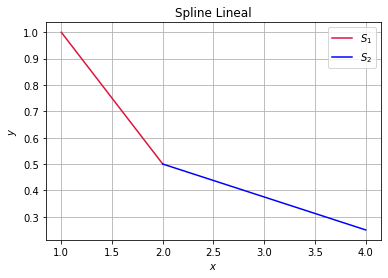

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# definicion del sistema S1 de ecuaciones
A = np.matrix([[1., 1.],[2.,1.]] )
b = np.array([1.,0.5])
print("Matriz A : \n",A)
print("Vector b : \n", b)
# solucion del sistema empleando numpy
sol1 = np.linalg.solve(A,b)
print("Solucion del primer sistema: ", sol1)
# definicion del sistema S2 de ecuaciones
A = np.matrix([[2., 1.],[4.,1.]] )
b = np.array([0.5,0.25])
print("Matriz A : \n",A)
print("Vector b : \n", b)
# solucion del sistema empleando numpy
sol2 = np.linalg.solve(A,b)
print("Solucion del segundo sistema: ", sol2)
# dominio de S1
x1 = np.linspace(1,2,10)
# dominio de S2
x2 = np.linspace(2,4,10)
# definicion de las rectas
y1 = sol1[0] * x1 + sol1[1]
y2 = sol2[0] * x2 + sol2[1] 
# se grafican ambas rectas
plt.plot(x1, y1, label = '$S_1$', color='crimson')
plt.plot(x2, y2, label = '$S_2$', color='b' )
#plt.plot(sol[0],sol[1],'ro')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Spline Lineal')
plt.grid()
plt.legend()
plt.show()

# Splines Cuadráticos

En este caso los splines $S_{i}\left(x\right)$ se construyen a través de los polinomios de grado 2, definidos sobre en los valores $x_{0},x_{1},\ldots,x_{n}$ y los puntos $\left(x_{0},f\left(x_{0}\right)\right),\ldots,\left(x_{n},f\left(x_{n}\right)\right)$, es decir 

$$S_{i}\left(x\right)=a_{i}x^{2}+b_{i}x+c_{i}\quad i=0,\ldots,n-1$$

De igual manera que en la interpolación lineal se tendrá un total de $n-1$ ecuaciones, donde $n$ es el numero de puntos sobre los cuales se define el spline.

La interpolación cuadrática nos va a asegurar que la función que nosotros generemos por partes con los distintos $S_{i}\left(x\right)$ va a ser continua, y para eso vamos a definir un conjunto de condiciones:
      
*   **1) Condición de interpolacion**: esta condición asegura que los splines pase por los puntos dados, es decir.

$$S_{i}\left(x_{i}\right)=f\left(x_{i}\right),\quad i=0,\ldots,n-1,\quad S_{n-1}\left(x_{n}\right)=f\left(x_{n}\right)$$
*   **2) Condiciones de continuidad (en nodos internos)**: con esta cóndición nos aseguramos que los splines esten conectados.

$$S_{i}\left(x_{i+1}\right)=S_{i+1}\left(x_{i+1}\right)\quad i=0,\ldots,n-2$$

*   **3) Condiciones de suavidad (en nodos internos)**: mediante esta condición suavizamos los picos que se pudieran presentar en los splines.

$$S_{i}'\left(x_{i}\right)=S'_{i+1}\left(x_{i}\right)\quad i=1,\ldots,n-1$$

Esto sin embargo no es suficiente, y necesitamos una condición más, ya que por cada $S_{i}\left(x\right)$ tenemos 3 incógnitas $(a, b$ y $c)$ y por ejemplo para el caso sencillo de tener unicamente 3 puntos, se tendrían 6 incógnitas y solo 5 ecuaciones, tres que igualan $S_{i}\left(x_{i}\right)$ con el valor de $f\left(x_{i}\right)$ en ese punto (dos por cada intervalo), quinta y sexta de igualar $S'_{i}\left(x_{i}\right)$ y $S'_{i+1}\left(x_{i}\right)$ en el punto común. E incluso aun así, no se garantiza la suavidad de $S\left(x\right)$.



## Ejemplo

Calcula el spline cuadrático natural, dados los siguientes datos.

| X | 3 |4.5|  7 |9| 
| :-:  | :-: | :-: |  :-: | :-: | 
| Y  | 2.5 |1|2.5|0.5 |

**Solución**: Hay que notar que se forman 3 intervalos y en cada uno de estos intervalos hay que definir un polinomio cuadrático que pase por cada uno de los puntos de la tabla de datos esto debido a la condición 1), es decir 

$$\begin{array}{c}
S_{0}\left(3\right)=2.5\\
S_{1}\left(4.5\right)=1\\
S_{2}\left(7\right)=2.5\\
S_{3}\left(9\right)=0.5
\end{array}$$

Por otro lado tomando en consideración la condición 2), tendríamos las siguientes ecuaciones 

$$\begin{array}{ccccc}
S_{0}\left(3\right) & \overset{\underbrace{cond.1)}}{=} & 2.5 & \Rightarrow & \left(3\right)^{2}a_{1}+3b_{1}+c_{1}=2.5\ldots..ec.1\\
S_{1}\left(4.5\right) & \overset{\underbrace{cond.1)}}{=} & 1 & \overset{\underbrace{cond.2)}}{\Rightarrow} & \begin{cases}
\left(4.5\right)^{2}a_{1}+4.5b_{1}+c_{1}=1\ldots ec.2\\
\left(4.5\right)^{2}a_{2}+4.5b_{2}+c_{2}=1\ldots ec.3
\end{cases}\\
S_{2}\left(7\right) & \overset{\underbrace{cond.1)}}{=} & 2.5 & \overset{\underbrace{cond.2)}}{\Rightarrow} & \begin{cases}
\left(7\right)^{2}a_{2}+7b_{2}+c_{2}=2.5\ldots\ldots ec.4\\
\left(7\right)^{2}a_{3}+7b_{3}+c_{3}=2.5\ldots\ldots ec.5
\end{cases}\\
S_{3}\left(9\right) & \overset{\underbrace{cond.1)}}{=} & 0.5 & \Rightarrow & \left(9\right)^{2}a_{3}+9b_{3}+c_{3}=0.5\ldots ec.6
\end{array}$$

Hasta este punto se tiene un total de 6 ecuaciones $\left(S_{i}\left(x\right)\;i=0,1,2,3\right)$ con 9 incógnitas $\left(a_{i},b_{i},c_{i}\quad i=1,2,3\right)$. En el caso de los splines cuadráticos, se pide que al spline se le pueda calcular la primer derivada.

$$S'\left(x\right)=\begin{cases}
S'_{0}\left(x\right)=2a_{1}x+b_{1} & x\in\left[3,4.5\right]\\
S'_{1}\left(x\right)=2a_{2}x+b_{2} & x\in\left[4.5,7\right]\\
S'_{2}\left(x\right)=2a_{3}x+b_{3} & x\in\left[7,9\right]
\end{cases}$$

Hay que notar que dado que el spline esta formado por segmentos de curvas, se podrían presentar discontinuidades en los cambios de intervalo. Las posibles discontinuidades se podrían dar en $x_{1}=4.5$ y $x_{2}=7$, así que para que $S'\left(x\right)$ sea continua se debe cumplir la condición 3).

$$\begin{array}{ccccc}
S'_{0}\left(4.5\right)=2a_{1}\left(4.5\right)+b_{1} & \overset{\underbrace{cond.3)}}{=} & 2a_{2}\left(4.5\right)+b_{2}=S'_{1}\left(4.5\right) & \Rightarrow & 9a_{1}+b_{1}=9a_{2}+b_{2}\ldots ec.7\\
S'_{1}\left(7\right)=2a_{2}\left(7\right)+b_{2} & \overset{\underbrace{cond.3)}}{=} & 2a_{3}\left(7\right)+b_{3}=S'_{2}\left(7\right) & \Rightarrow & 14a_{2}+b_{2}=14a_{3}+b_{3}\ldots ec.8
\end{array}$$

De tal manera que ahora tenemos un total de 8 ecuaciones con 9 incógnitas, esto nos permite elegir una de las variables igual a cero **(spline cuadrático natural)**, aunque si se tuviera más información sobre el problema se podría optar por otra estrategia. Podemos elegir por simplicidad ${\color{blue}{a_{1}=0}}$.

Finalmente podemos decir que tenemos un total de 8 ecuaciones con 8 incógnitas

$$\begin{array}{cc}
3b_{1}+c_{1}=2.5\quad & 49a_{3}+7b_{3}+c_{3}=2.5\\
4.5b_{1}+c_{1}=1\quad & 81a_{3}+8b_{3}+c_{3}=0.5\\
20.25a_{2}+4.5b_{2}+c_{2}=1\quad & b_{1}=9a_{2}+b_{2}\\
49a_{2}+7b_{2}+c_{2}=2.5 & 14a_{2}+b_{2}=14a_{3}+b_{3}
\end{array}$$

Este conjunto de ecuaciones forman un sistema del tipo $A\vec{x}=\vec{b}$, que se ve de la siguiente manera

$$\left(\begin{array}{cccccccc}
3 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
4.5 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 20.25 & 4.5 & 1 & 0 & 0 & 0\\
0 & 0 & 49 & 7 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 49 & 7 & 1\\
0 & 0 & 0 & 0 & 0 & 81 & 9 & 1\\
1 & 0 & -9 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 14 & 1 & 0 & -14 & -1 & 0
\end{array}\right)\left(\begin{array}{c}
b_{1}\\
c_{1}\\
a_{2}\\
b_{2}\\
c_{2}\\
a_{3}\\
b_{3}\\
c_{3}
\end{array}\right)=\left(\begin{array}{c}
2.5\\
1\\
1\\
2.5\\
2.5\\
0.5\\
0\\
0
\end{array}\right)$$

Después de resolver este sistema, encontramos los coeficientes de los $S\left(x\right)_{i}\:i=0,1,2$ que se buscaban inicialmente.

Dichos valores son

$$\begin{array}{ccc}
a_{1}=0\quad & a_{2}=0.64 & a_{3}=-1.6\\
b_{1}=-1\quad & b_{2}=-6.76 & b_{3}=24.6\\
c_{1}=5.5\quad & c_{2}=18.46 & c_{3}=-91.3
\end{array}$$

Así que usando estos valores, el spline cuadrático natural que interpola los datos de este ejemplo es

$$S\left(x\right)=\begin{cases}
-x+5.5 & si\,x\in\left[3,4.5\right]\\
0.64x^{2}-6.76x+18.46 & si\,x\in\left[4.5,7\right]\\
-1.6x^{2}+24.6x-91.3 & si\,x\in\left[7,9\right]
\end{cases}$$


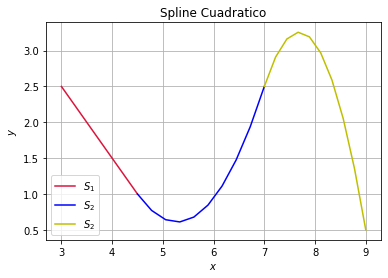

In [ ]:
# dominio de S1
x1 = np.linspace(3.,4.5,10)
# dominio de S2
x2 = np.linspace(4.5,7.,10)
# dominio de S3
x3 = np.linspace(7.,9.,10)
# definicion de las curvas
y1 = -x1 + 5.5
y2 = 0.64*x2**(2)-6.76*x2+18.46
y3 = -1.6*x3**(2)+24.6*x3-91.3
# se grafican ambas rectas
plt.plot(x1, y1, label = '$S_1$', color='crimson')
plt.plot(x2, y2, label = '$S_2$', color='b' )
plt.plot(x3, y3, label = '$S_2$', color='y' )
#plt.plot(sol[0],sol[1],'ro')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Spline Cuadratico')
plt.grid()
plt.legend()
plt.show()

# Splines Cúbicos

Para que el spline sea mas 'suave' sera **necesario la existencia de la primera y segunda derivada** de dicho spline, por lo que ahora para realizar la interpolación por partes sera necesario tomar el polinomio general de grado 3, es decir

$$S_{i}\left(x\right)=a_{i}x^{3}+b_{i}x^{2}+c_{i}x+d\quad i=0,\ldots,n-1$$

En este caso vamos a tener cuatro variables por cada intervalo $(a,b,c,d)$, y una nueva condición para cada punto común a dos intervalos, respecto a la derivada segunda.

Para poder construir dichos polinomios, necesitamos pedir que se cumplan algunas de las condiciones previamente establecidas y un par mas. Las condiciones necesarias se enumeran a continuación:

*   1) Condición de interpolación:
$$S_{i}\left(x_{i}\right)=f\left(x_{i}\right)\quad i=0,\ldots,n-1$$

*   2) Condición de continuidad (nodos internos):

$$S_{i}\left(x_{i+1}\right)=S_{i+1}\left(x_{i+1}\right)\quad i=0,\ldots,n-1$$

*   3) Condiciones de suavidad (nodos internos)

$$1) S'_{i}\left(x_{i}\right)=S'_{i+1}\left(x_{i}\right)\quad i=1,\ldots,n-1$$

$$2) S''_{i}\left(x_{i}\right)=S''_{i+1}\left(x_{i}\right)\quad i=1,\ldots,n-1$$

De tal manera que con estas condiciones, tenemos un total de $4n-2$ ecuaciones.

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/ecuaciones.PNG?raw=1" width="600">

Definimos un par de ecuaciones extras para que se complete el sistema de ecuaciones y se tenga un sistema de ecuaciones lineales de la forma $Ax=b$.

$S_{0}^{''}\left(x_{0}\right)=0\,$ y $\,S_{n-1}^{''}\left(x_{n}\right)=0\quad Spline\,C\acute{u}bico\,Natural$

$S_{0}^{'}\left(x_{0}\right)=f'\left(x_{0}\right)\,$ y $\,S_{n-1}^{'}\left(x_{n}\right)=f'\left(x_{n}\right)\quad Spline\,C\acute{u}bico\,Sujeto$

### Construcción de Splines Cúbicos Naturales

Si tomamos $S\left(x_{i}\right)=z_{i}$ para $\,0\leq i\leq n$ sobre $\left[x_{i},x_{i+1}\right]$, tenemos que $S_{i}^{''}\left(x\right)$ es una interpolación lineal y considerando que por construcción $S_{i}^{''}\left(x_{i+1}\right)=z_{i+1}$. Podemos escribir a $S_{i}^{''}$ así

$$S_{i}^{''}\left(x\right)=\frac{x-x_{i+1}}{x_{i}-x_{i+1}}z_{i}+\frac{x-x_{i}}{x_{i+1}-x_{i}}z_{i+1}$$

Si integramos $S_{i}^{''}\left(x\right)$ dos veces, obtenemos

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+cx+d \tag{5}$$

Donde $h_{i}=x_{i+1}-x_{i}$ y $c, d$ son las constantes de integración. Ahora podemos emplear las condiciones de interpolación y continuidad para obtener las siguientes ecuaciones

$$interpol.\ y \ cont.=\begin{cases}
h_{i}^{3}\frac{z_{i}}{6h_{i}}+cx_{i}+d=f\left(x_{i}\right)=y_{i} & c=\frac{y_{i+1}-y_{i}}{h_{i}}-\frac{\left(z_{i+1}-z_{i}\right)}{6}h_{i}\\
h_{i}^{3}\frac{z_{i}}{6h_{i}}+cx_{i+1}+d=f\left(x_{i+1}\right)=y_{i+1} & d=\frac{y_{i}x_{i+1}-y_{i+1}x_{i}}{h_{i}}+\frac{x_{i}z_{i+1}-x_{i+1}z_{i}}{6}h_{i}
\end{cases}$$

Remplazando en la ecuación $(5)$, tenemos 

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{\left(y_{i+1}-y_{i}\right)}{hi}-\frac{\left(z_{i+1}-z_{i}\right)}{6}h_{i}\right)x\frac{y_{i}x_{i+1}-y_{i+1}x_{i}}{h_{i}}+\frac{x_{i}z_{i+1}-x_{i+1}z_{i}}{6}h_{i} \tag{6}$$

La ecuación $(6)$ también es conocida como, la **forma general del Spline Cúbico**

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{y_{i}}{h_{i}}-\frac{z_{i}h_{i}}{6}\right)\left(x_{i+1}-x\right)+\left(\frac{y_{i+1}}{h_{i}}-\frac{z_{i+1}h_{i}}{6}\right)\left(x-x_{i}\right)$$

Para encontrar $z_{i}$ y $z_{i+1}$ empleamos la primer condición de suavidad, por lo que al derivar y reemplazar en $(6)$ obtenemos 

$$S_{i}^{'}\left(x_{i}\right)=-\frac{1}{3}h_{i}z_{i}-\frac{1}{6}h_{i}z_{i+1}+d_{i}$$ 
y

$$S_{i-1}^{'}\left(x_{i}\right)=\frac{1}{6}h_{i-1}z_{i-1}+\frac{1}{3}h_{i-1}z_{i}+d_{i-1}$$

con 

$$d_{i}=\frac{y_{i+1}-y_{i}}{h_{i}}\quad y\quad d_{i-1}=\frac{y_{i}-y_{i-1}}{h_{i-1}}$$

Finalmente, dado que $S_{i-1}^{'}\left(x_{i}\right)=S_{i}^{'}\left(x_{i}\right)$ tenemos la siguiente ecuación para $i=1,\ldots,n-1$

$$h_{i-1}z_{i-1}+2\left(h_{i-1}+h_{i}\right)z_{i}+h_{i}z_{i+1}=6\left(d_{i}-d_{i-1}\right) \tag{7}$$

La ecuación $(7)$ se deriva de $(6)$ y es con esta ecuación que se genera un sistema de ecuaciones mediante el cual podemos encontrar los coeficientes de los Splines.

Para el caso del Spline Cúbico natural $z_{0}=z_{n}=0$ la ecuación $(6)$ nos conduce a un sistema de ecuaciones, simétrico, tridiagonal, diagonal dominante, de la forma siguiente

$$\left(\begin{array}{cccccc}
u_{1} & h_{1} & 0 & 0 & \cdots & 0\\
h_{1} & u_{2} & h_{2} & 0 & \cdots & 0\\
0 & h_{2} & u_{3} & h_{3} & \ddots & 0\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots\\
0 & 0 & \cdots & h_{n-3} & u_{n-2} & h_{n-2}\\
0 & 0 & \cdots & 0 & h_{n-2} & u_{n-1}
\end{array}\right)\left(\begin{array}{c}
z_{1}\\
z_{2}\\
\vdots\\
z_{n-2}\\
z_{n-1}
\end{array}\right)=\left(\begin{array}{c}
v_{1}\\
v_{2}\\
\vdots\\
v_{n-2}\\
v_{n-1}
\end{array}\right) \tag{8}$$

Donde

$$\begin{cases}
h_{i} & =x_{i+1}-x_{i}\\
u_{i} & =\frac{2}{6}\left(h_{i}+h_{i-1}\right)\\
d_{i} & =\frac{y_{i+1}-y_{i}}{h_{i}},\,y_{i}=f\left(x_{i}\right)\\
v_{i} & =6\left(d_{i}-d_{i-1}\right)
\end{cases}$$

#### Ejemplo

Sea el siguiente conjunto de datos.

| X | 8 |11| 15 |18|22| 
| :-:  | :-: | :-: |  :-: | :-: | :-: | 
| Y  | 5 | 9|10|8 |7|

1. Determine el spline cúbico natural que ajusta los datos.

2. Use el spline calculado en $(1)$ para encontrar el valor interpolado en $x=12.7$.

**Solución**: 

Tenemos que $n=5$, y son 4 splines $\left(i=0,\ldots,3\right)$. La ecuación cúbica en el i-ésimo spline es 

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{y_{i}}{h_{i}}-\frac{z_{i}h_{i}}{6}\right)\left(x_{i+1}-x\right)+\left(\frac{y_{i+1}}{h_{i}}-\frac{z_{i+1}h_{i}}{6}\right)\left(x-x_{i}\right)$$

Para $x_{i}\leq x\leq x_{i+1}$, con $i=0,\ldots,n$ donde $h_{i}=x_{i+1}-x_{i}$ que es la distancia del i-ésimo intervalo. Para encontrar los coeficientes intermedios $z_{i}$ se emplea la ecuación $(7)$

$$h_{i-1}z_{i-1}+2\left(h_{i-1}+h_{i}\right)z_{i}+h_{i}z_{i+1}=6\left(d_{i}-d_{i-1}\right)$$

Como se pidió el spline cúbico natural, entonces $z_{0}=z_{4}=0$ y los valores de $h_{i}$ son

$$\begin{array}{cc}
h_{0}=x_{1}-x_{0}=11-8=3 & h_{1}=x_{2}-x_{1}=15-11=4\\
h_{2}=x_{3}-x_{2}=18-15=3 & h_{3}=x_{4}-x_{3}=22-18=4
\end{array}$$

Substituyendo estos valores en (8), para $i=1,2,3$ se obtiene el siguiente sistema de ecuaciones

$$\begin{array}{c}
14z_{2}+4z_{3}=-6.5\\
4z_{2}+14z_{3}+3z_{4}=-5.5\\
3z_{3}+14z_{4}=-5.5
\end{array}$$

Resolviendo el sistema de ecuaciones con alguno de los métodos conocidos, se encuentran los coeficientes del spline 

$$z_{2}=-0.4067,\,z_{3}=-0.2018,\,z_{4}=-0.3497$$

una vez encontrados dichos coeficientes, se substituyen en $S_{2}\left(x\right)$, ya que ese el intervalo que se requiere evaluar 

$$S_{2}\left(x\right)=\left(-0.01694\right)\left(15-x\right)^{3}+\left(-0.00846\right)\left(x-11\right)^{3}+2.3178\left(15-x\right)+2.5533\left(x-11\right)\,11\leq x\leq15 $$

Finalmente para responder b) se evaluá $x=12.7$ en $S_{2}\left(x\right)$ y se obtiene $S_{2}\left(12.7\right)=9.424$

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/pato.PNG?raw=1" width="450">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/polinomio.PNG?raw=1" width="450">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/cubico.PNG?raw=1" width="450">

#  Referencias

*   http://vpena.pag.alumnos.inf.utfsm.cl/ramos/ili286/splines.pdf
*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.
*   http://www4.ujaen.es/~angelcid/Archivos/An_Met_Num_INFORMATICA/Splines.pdf